### Imports

In [1]:
import random
import os
import re
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import matplotlib.pyplot as plt
import numpy as np

### Prepara listas de fontes e de palavras

In [2]:
# Lista fontes do windows (alterar pasta se necessário):
fontesPath = "C:\Windows\Fonts"
todasFontes = os.listdir(fontesPath)
# Filtra fontes 'interessantes':
fontesInteressantes = ['arial','times','cambria','calibri', \
                       'book','cent','comic','consolas', \
                       'corbel','cour','fra','gara', \
                       'georgia','letter','sans','minion', \
                       'myriad','tahoma','verdana','adobe']
fontes = []
for f in todasFontes:
    if any([s.lower() in f.lower() for s in fontesInteressantes]):
        fontes.append(f)
        
# Gera lista de palavras a partir de um livro
def limpa_string(s,l):
    out = ""
    for c in s:
        if c not in l:
            out += c
    return out

palavras = []
caracteresIndesejados = '"@#$%&*-_!/?\|!:;)(1234567890.><][}{+=,'
with open('jules_verne.txt','r') as f:
    for line in f:
        for word in line.split():
            palavras.append(limpa_string(word,caracteresIndesejados))
palavras = np.unique(palavras)

### Gera uma imagem em branco

In [3]:
im = Image.new('RGB',(1100, 1500),'white')
dsnh = ImageDraw.Draw(im)

### Insere lista de palavras aleatórias na imagem

In [4]:
lins = 70 #número de linhas a gerar
pals = 1 #número de palavras por linha
numSize = 9 #número de caracteres no número a gerar
whiteSpace = 8 #número de "espaços" entre palavra e número
greyness = random.randint(0,80) #gera tons de cinza aleatórios (mais que 50!)
fontSize = random.randint(12,24) #gera tamanho aleatório de fonte
fontChoice = random.choice(fontes) #escolhe uma fonte aleatória

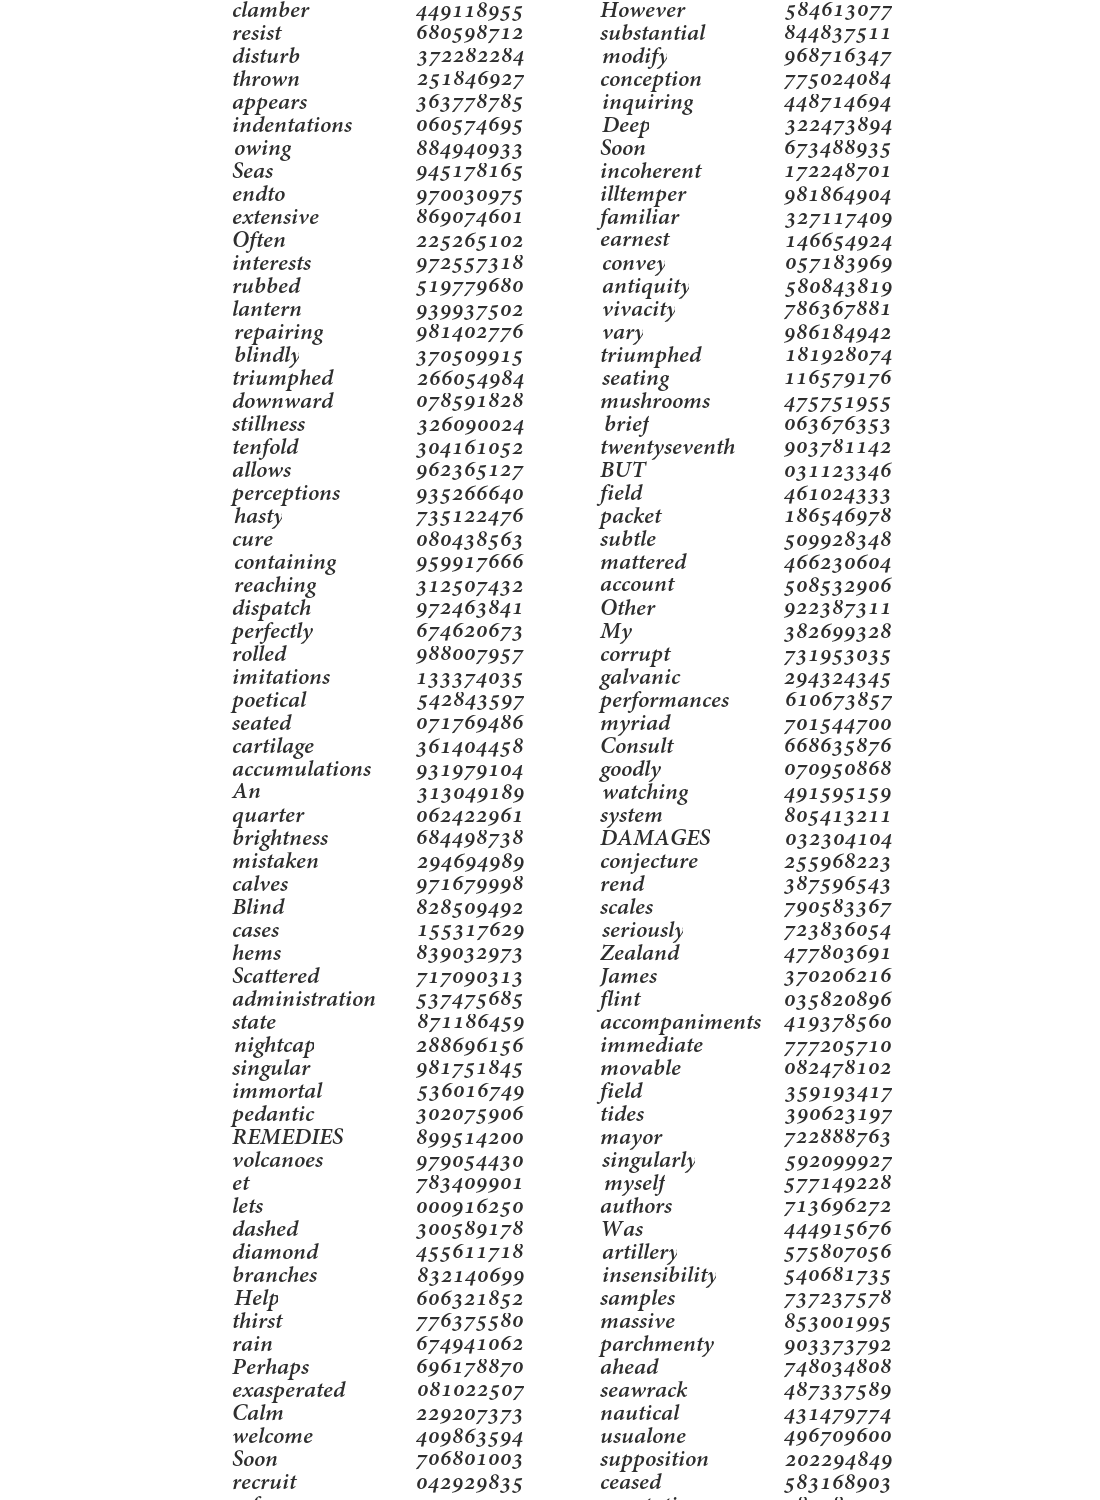

In [5]:
font = ImageFont.truetype(fontChoice, fontSize)
colPalavras = []
colNumeros = []
for l in range(2*lins):
    colPalavras.append(random.choice(palavras))
    colNumeros.append(''.join(["%s" % random.randint(0, 9) for num in range(0, numSize)]))

if im.size[0]-((max([len(x) for x in colPalavras])+1.5*whiteSpace+numSize)*fontSize*int(1.2)) < 0:
    posX = 0
else:
    posX = random.randint(0,im.size[0]-((max([len(x) for x in colPalavras])+1.5*whiteSpace+numSize)*fontSize*int(1.2)))
if im.size[1]-(lins)*fontSize < 0:
    posY = 0
else:
    posY = random.randint(0,im.size[1]-(lins)*fontSize)

for l in range(lins):
    dsnh.text((posX,(posY+l*fontSize)),colPalavras[l],(greyness,greyness,greyness),font=font)
    dsnh.text((posX+2*whiteSpace*fontSize,(posY+l*fontSize)),colPalavras[l+lins],(greyness,greyness,greyness),font=font)
    dsnh.text(((posX+whiteSpace*fontSize),(posY+l*fontSize)),colNumeros[l],(greyness,greyness,greyness),font=font)
    dsnh.text(((posX+3*whiteSpace*fontSize),(posY+l*fontSize)),colNumeros[l+lins],(greyness,greyness,greyness),font=font)

im

### Tornando produtivo:

In [6]:
def gera_imagem_limpa():
    im = Image.new('RGB',(1100, 1500),'white')
    dsnh = ImageDraw.Draw(im)
    lins = 70 #número de linhas a gerar
    pals = 1 #número de palavras por linha
    numSize = 9 #número de caracteres no número a gerar
    whiteSpace = 8 #número de "espaços" entre palavra e número
    greyness = random.randint(0,80) #gera tons de cinza aleatórios (mais que 50!)
    fontSize = random.randint(12,24) #gera tamanho aleatório de fonte
    fontChoice = random.choice(fontes) #escolhe uma fonte aleatória
    font = ImageFont.truetype(fontChoice, fontSize)

    colPalavras = []
    colNumeros = []
    for l in range(2*lins):
        colPalavras.append(random.choice(palavras))
        colNumeros.append(''.join(["%s" % random.randint(0, 9) for num in range(0, numSize)]))

    if im.size[0]-((max([len(x) for x in colPalavras])+1.5*whiteSpace+numSize)*fontSize*int(1.2)) < 0:
        posX = 0
    else:
        posX = random.randint(0,im.size[0]-((max([len(x) for x in colPalavras])+1.5*whiteSpace+numSize)*fontSize*int(1.2)))
    if im.size[1]-(lins)*fontSize < 0:
        posY = 0
    else:
        posY = random.randint(0,im.size[1]-(lins)*fontSize)

    for l in range(lins):
        dsnh.text((posX,(posY+l*fontSize)),colPalavras[l],(greyness,greyness,greyness),font=font)
        dsnh.text((posX+2*whiteSpace*fontSize,(posY+l*fontSize)),colPalavras[l+lins],(greyness,greyness,greyness),font=font)
        dsnh.text(((posX+whiteSpace*fontSize),(posY+l*fontSize)),colNumeros[l],(greyness,greyness,greyness),font=font)
        dsnh.text(((posX+3*whiteSpace*fontSize),(posY+l*fontSize)),colNumeros[l+lins],(greyness,greyness,greyness),font=font)
    return im

In [46]:
qtdArquivos = 30 #quantidade máxima de arquivos a serem gerados
for i in range(qtdArquivos):
    try:
        im = gera_imagem_limpa()
        file = os.getcwd()+'\\imgs\\teste\\img_limpa_%05d.jpg'%i
        if not os.path.exists(os.getcwd()+'\\imgs\\teste'):
            print("Criando pasta imgs/teste")
            os.makedirs(os.getcwd()+'\\imgs\\teste')
        im.save(file)
        print('\rImagem %d/%d gerada com sucesso!            '%(i+1,qtdArquivos),end='',flush=True)
    except:
        print('\rerro encontrado, gerando nova imagem        ',end='',flush=True)
        im = gera_imagem_limpa()
        file = os.getcwd()+'\\imgs\\teste\\img_limpa_%05d.jpg'%i
        if not os.path.exists(os.getcwd()+'\\imgs\\teste'):
            print("Criando pasta imgs/teste")
            os.makedirs(os.getcwd()+'\\imgs\\teste')
        im.save(file)

Criando pasta imgs/teste
Imagem 30/30 gerada com sucesso!            